In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
df = pd.read_csv(data_url)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
choosen_columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df_filtered = df[choosen_columns]
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
df_filtered

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

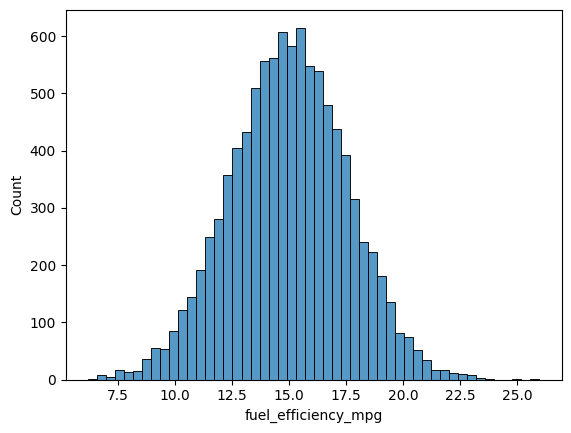

In [4]:
# plot and observe
sns.histplot(df_filtered['fuel_efficiency_mpg'], bins=50) #Not a long tail but a normal distribution


In [5]:
# q1: There's one column with missing values. What is it?
missing_values_per_col=df_filtered.isna().sum().reset_index(name="N_missing_values")
missing_values_col = missing_values_per_col[missing_values_per_col["N_missing_values"] > 0]
print(f"""Q1 A1: {missing_values_col['index'][1]}""")

Q1 A1: horsepower


In [6]:
# Q2: What's the median (50% percentile) for variable 'horsepower'?
print(f"""Q1 A1: {int(df_filtered['horsepower'].median())}""")

Q1 A1: 149


In [7]:
# Missing values
df_filtered.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [8]:
df_filtered['horsepower'].mean()

np.float64(149.65729212983547)

In [9]:
X_train_fill0 = df_filtered.fillna(0)
X_train_fillM = df_filtered.fillna(round(df_filtered['horsepower'].mean(),2))

In [10]:
X_train_fill0

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,0.0,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [11]:
X_train_fillM

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.00,3413.433759,2003,13.231729
1,130,97.00,3149.664934,2007,13.688217
2,170,78.00,3079.038997,2018,14.246341
3,220,149.66,2542.392402,2009,16.912736
4,210,140.00,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.00,2981.107371,2013,15.101802
9700,180,154.00,2439.525729,2004,17.962326
9701,220,138.00,2583.471318,2008,17.186587
9702,230,177.00,2905.527390,2011,15.331551


In [12]:
X_train_fillM.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [13]:
df_filtered.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [14]:
# Split dataset
n = len(df)
n_validation = int(n * .2)
n_test = int(n * .2)
n_train = n - n_validation - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

# Now use the shuffled indexes to select the data
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train: n_train + n_test]]
df_validation =  df.iloc[idx[n_train + n_test:]]

df_test


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
6163,180,0.0,112.0,2772.134410,15.9,2020,Europe,Gasoline,Front-wheel drive,3.0,15.366341
3313,260,5.0,138.0,3014.061530,NaN,2022,Europe,Gasoline,Front-wheel drive,-2.0,14.601182
4781,140,7.0,181.0,3652.186151,NaN,2016,USA,Diesel,All-wheel drive,1.0,12.247032
8210,270,4.0,105.0,2753.040847,16.3,2023,Asia,Gasoline,Front-wheel drive,0.0,15.136400
6713,170,4.0,224.0,4163.375137,11.9,2003,USA,Gasoline,Front-wheel drive,0.0,10.340419
...,...,...,...,...,...,...,...,...,...,...,...
7802,290,2.0,205.0,3403.401496,15.9,2019,USA,Gasoline,Front-wheel drive,1.0,13.868607
6780,200,8.0,159.0,2752.516039,16.7,2009,Europe,Gasoline,All-wheel drive,-1.0,15.665403
7541,230,3.0,202.0,3303.000688,NaN,2008,Europe,Diesel,Front-wheel drive,-1.0,13.613127
1577,220,4.0,169.0,3293.420251,13.2,2008,Asia,Diesel,All-wheel drive,1.0,13.733343


In [15]:
# inplace dropping indexes
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_validation.reset_index(drop=True, inplace=True)

In [16]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
y_validation = np.log1p(df_validation.fuel_efficiency_mpg.values)
y_test

array([2.79522685, 2.74734667, 2.58377354, ..., 2.68192023, 2.69011317,
       2.82233377], shape=(1940,))

In [17]:
del df_train['fuel_efficiency_mpg']
del df_validation['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [18]:
def prepare_X(df, base=base, fill=0):
    df = df.copy()
    df_num = df[base].fillna(fill)
    X = df_num.values
    return X

In [19]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) #Gram Matrix
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [20]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [22]:
X_train = prepare_X(df_train, base, 0)
X_val = prepare_X(df_validation, base, 0)
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_val.dot(w)
round(rmse(y_validation, y_pred),2)

np.float64(0.04)

In [26]:
# Fill with mean
X_train = prepare_X(df_train, base, round(df_filtered['horsepower'].mean(),2))
X_val = prepare_X(df_validation, base, round(df_filtered['horsepower'].mean(),2))
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_val.dot(w)
round(rmse(y_validation, y_pred),2)

np.float64(0.03)

#### Q3: Which option gives better RMSE?
- With mean. Because `rmse_fillWithMean = 0.03`, `rmse_fillWithZero = 0.04`

In [25]:
def train_linear_regression_reg(X,y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) #Gram Matrix
    
    # Regularization
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [29]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
X_train = prepare_X(df_train, base, 0)
X_val = prepare_X(df_validation, base, 0)

for r in r_list:
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)
    y_pred = w0 + X_val.dot(w)
    print(f"r={r} --> rmse = {rmse(y_validation, y_pred)}")

r=0 --> rmse = 0.03785196276929101
r=0.01 --> rmse = 0.03788071229270311
r=0.1 --> rmse = 0.03852964389619171
r=1 --> rmse = 0.03946399168466206
r=5 --> rmse = 0.03962930595277164
r=10 --> rmse = 0.039651714533163664
r=100 --> rmse = 0.03967223909895948


#### Q4: If multiple options give the same best RMSE, select the smallest `r`
 - Answer: `0`

In [37]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []

for s in seeds:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    # Now use the shuffled indexes to select the data
    df_train = df.iloc[idx[:n_train]]
    # df_test = df.iloc[idx[n_train: n_train + n_test]]
    df_validation =  df.iloc[idx[n_train + n_test:]]

    X_train = prepare_X(df_train, base, 0)
    X_val = prepare_X(df_validation, base, 0)
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    rmse_list.append(rmse(y_validation, y_pred))

rmse_list

[np.float64(0.1580724676155306),
 np.float64(0.15793584039883687),
 np.float64(0.15799561203512083),
 np.float64(0.15800245777937558),
 np.float64(0.15815593040293682),
 np.float64(0.15797152137273895),
 np.float64(0.1579301309322537),
 np.float64(0.1580135118303361),
 np.float64(0.15797160360716486),
 np.float64(0.15794385911737485)]

In [38]:
std = np.std(rmse_list)
std

np.float64(6.598185063320823e-05)

In [40]:
round(std, 3)

np.float64(0.0)

#### Q5: What's the value of std?
- 0.600

In [46]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
# Now use the shuffled indexes to select the data
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train: n_train + n_test]]
df_validation =  df.iloc[idx[n_train + n_test:]]

df_full_train = pd.concat([df_train, df_validation])
y_full_train = np.concatenate([y_train, y_validation])

X_full_train = prepare_X(df_full_train, base, 0)
X_test = prepare_X(df_test, base, 0)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, 0.001)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.1718984428294825)

#### Q6: What's the RMSE on the test dataset?
- 0.15